In [190]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split 

#https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python
from sklearn import preprocessing 
lab_enc = preprocessing.LabelEncoder()
#cannot pass floats to classifiers (e.g. DecisionTree) that expects cateforical values as target
#Convert target winPlacePerc by using scikit's LabelEncoder()

train = pd.read_csv('../../data sets/pubg/train_V2.csv')
train = train.dropna()
#train

In [191]:
test = pd.read_csv('../../data sets/pubg/test_V2.csv')
#test
#test

In [192]:
train.count()

Id                 4446965
groupId            4446965
matchId            4446965
assists            4446965
boosts             4446965
damageDealt        4446965
DBNOs              4446965
headshotKills      4446965
heals              4446965
killPlace          4446965
killPoints         4446965
kills              4446965
killStreaks        4446965
longestKill        4446965
matchDuration      4446965
matchType          4446965
maxPlace           4446965
numGroups          4446965
rankPoints         4446965
revives            4446965
rideDistance       4446965
roadKills          4446965
swimDistance       4446965
teamKills          4446965
vehicleDestroys    4446965
walkDistance       4446965
weaponsAcquired    4446965
winPoints          4446965
winPlacePerc       4446965
dtype: int64

In [193]:
train.dtypes

Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

In [194]:
#data = train.iloc[:,3:28].drop('matchType', axis=1)
# data = train.loc[:,'assists':'boosts'] #true infinite
# target = train.loc[:,'assists'] #true infinite

test_data = test.loc[:,['assists','boosts']]
#4446965 
data = train.loc[:,['assists','boosts']] # true nan
data = data[:-1800000]
data1 = data[-1700000:]
data_clean = data.append(data1)

#[:-2220000], [:-2000000], [:-1800000]
##[:-1110000] fail
target = train.loc[:,['winPlacePerc']] # true nan
target = target[:-1800000]
target1 = target[-1700000:]
target_clean = target.append(target1)


#[:-2220000], [:-2000000], [:-1800000]
encoded = lab_enc.fit_transform(target_clean.values.ravel())

#target = target.values.astype(np.float)
######

#target.to_csv('target.csv')
#target.dtypes
encoded

array([1286, 1849, 2236, ..., 1689, 1889, 2242], dtype=int64)

Coefficients: 
 [2881.84396872]
Mean squared error: 12.52
Variance score: 1.00


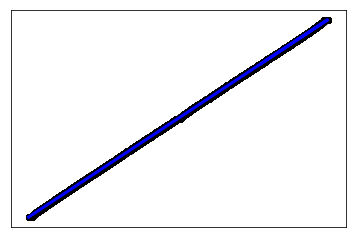

In [195]:
#split into training and test data
# X_train, X_test, y_train, y_test = train_test_split(
#     data_clean, encoded, stratify=encoded, random_state=0)
y_train = encoded[:-3477572]
y_test = encoded[-869394:]

X_train = target_clean[:-3477572]
X_test = target_clean[-869394:]

tree = DecisionTreeClassifier(random_state=0, max_depth=6)
tree.fit(data_clean, encoded)
#tree.fit(X_train, y_train)

regr = linear_model.LinearRegression() #run ordinary least squares

# Train the model using the training sets
regr.fit(X_train, y_train) ##this is where "learning" happens!


#output = tree.predict(test_predict)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, regr.predict(X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [150]:
encoded

array([1286, 1849, 2236, ..., 1889, 2242, 1821], dtype=int64)